In [2]:
from tensorflow.examples.tutorials.mnist import input_data
data_dir = '/tmp/tensorflow/mnist/input_data'
# Import data
mnist = input_data.read_data_sets(data_dir, one_hot=True)
print(mnist.train.images.shape, mnist.test.images.shape)

Extracting /tmp/tensorflow/mnist/input_data\train-images-idx3-ubyte.gz
Extracting /tmp/tensorflow/mnist/input_data\train-labels-idx1-ubyte.gz
Extracting /tmp/tensorflow/mnist/input_data\t10k-images-idx3-ubyte.gz
Extracting /tmp/tensorflow/mnist/input_data\t10k-labels-idx1-ubyte.gz
(55000, 784) (10000, 784)


In [3]:
x_train, x_val = mnist.train.images[:10000], mnist.test.images
print(x_train.shape, x_val.shape)

(10000, 784) (10000, 784)


In [34]:
from sklearn.decomposition import PCA
import numpy as np
pca_dim = 80
pca = PCA(n_components=pca_dim)
pca.fit(x_train)
x_pca = pca.fit_transform(x_train)
x_pca_inv = pca.inverse_transform(x_pca)
x_train_mse = np.mean((x_train - x_pca_inv)**2)
x_pca_val = pca.fit_transform(x_val)
x_pca_val_inv = pca.inverse_transform(x_pca_val)
x_val_mse = np.mean((x_val - x_pca_val_inv)**2)
print("pca_dim = {}, x_train_mse = {}, x_val_mse = {}".format(pca_dim, x_train_mse, x_val_mse))

pca_dim = 80, x_train_mse = 0.007264833897352219, x_val_mse = 0.007073782850056887


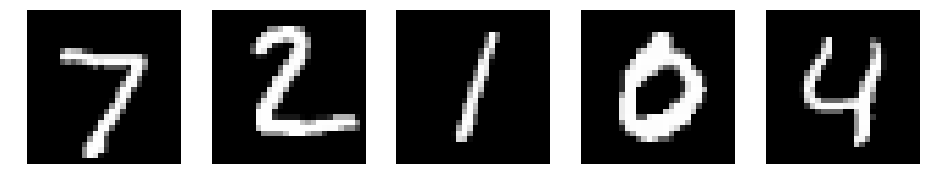

original mnist validation data


In [35]:
import matplotlib.pyplot as plt
fig_num = 5
plt.subplots(figsize=(16,16))
for i in range(fig_num):
    plt.subplot(1,fig_num,i+1)
    plt.imshow(x_val[i].reshape(28,28), cmap='Greys_r')
    plt.axis('off')
plt.show()
print("original mnist validation data")

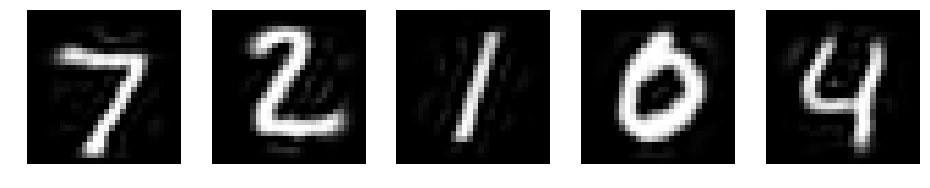

pca reconstruct mnist validation data


In [36]:
x_pca_val_inv_clip = np.clip(x_pca_val_inv,0,1)
plt.subplots(figsize=(16,16))
for i in range(fig_num):
    plt.subplot(1,fig_num,i+1)
    plt.imshow(x_pca_val_inv_clip[i].reshape(28,28), cmap='Greys_r')
    plt.axis('off')
plt.show()
print("pca reconstruct mnist validation data")